In [1]:
#importing Neccesary Libraries
import pandas as pd; pd.set_option('display.max_rows', 1000);
pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.drop("Id",axis=1,inplace=True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species', ylabel='count'>

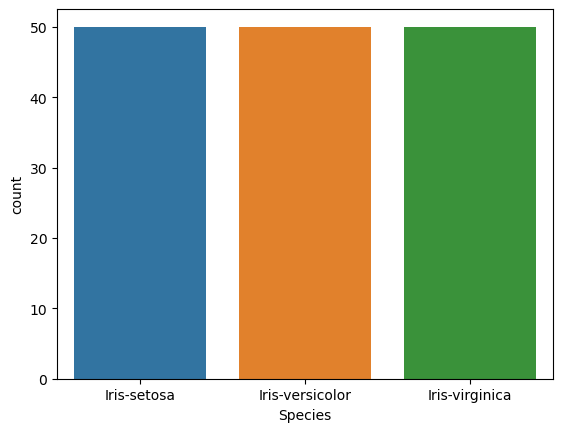

In [36]:
sns.countplot(x='Species',data=df)

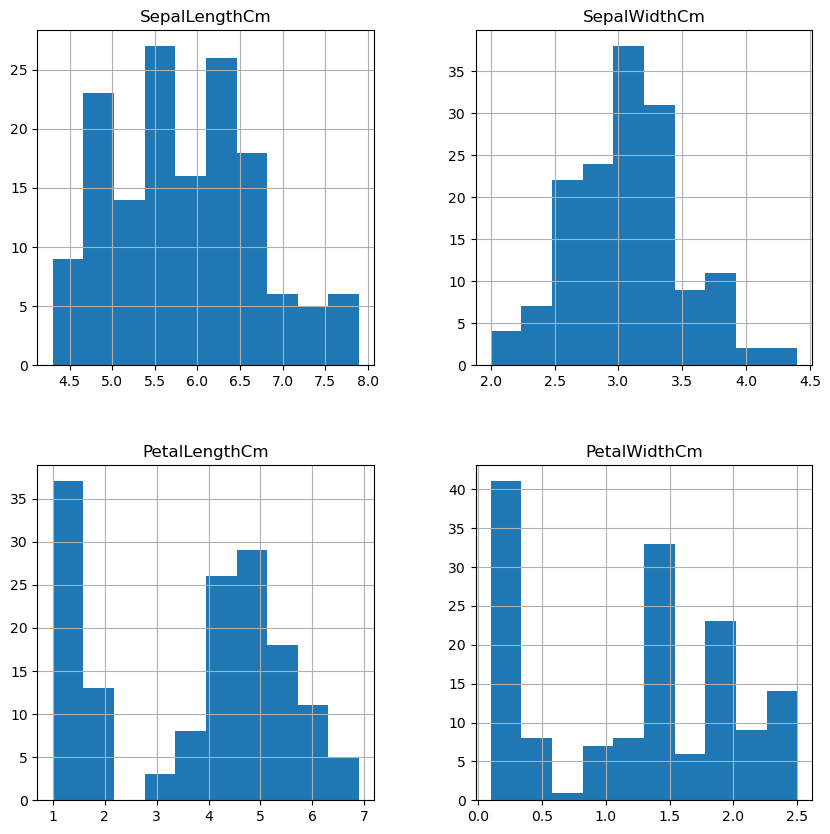

In [37]:
histo = df.hist(figsize=(10,10))

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

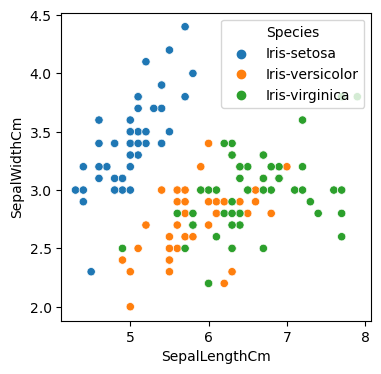

In [40]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

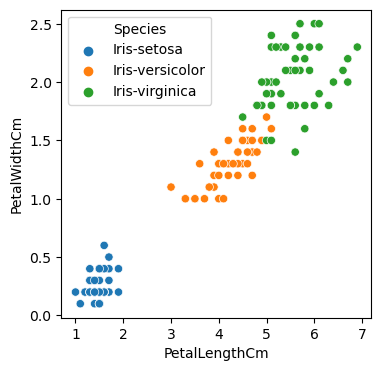

In [41]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species")

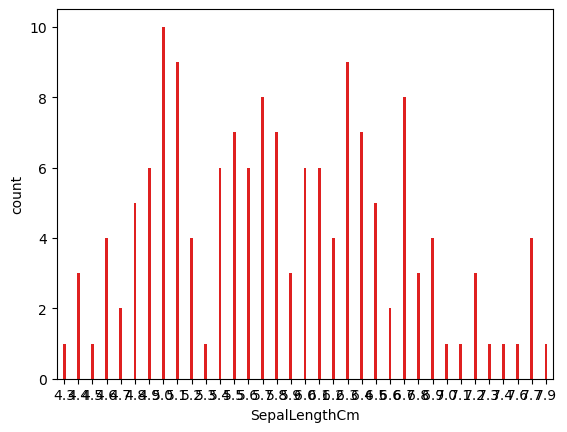

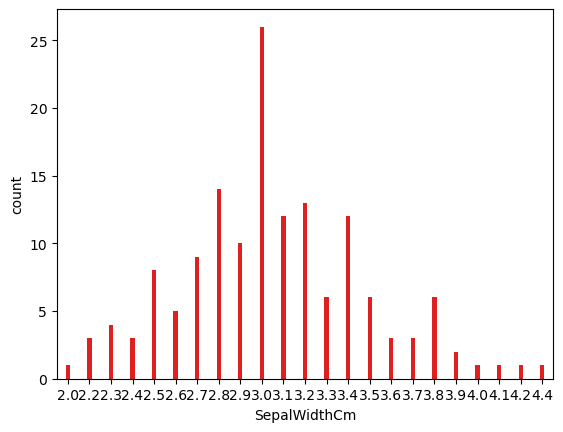

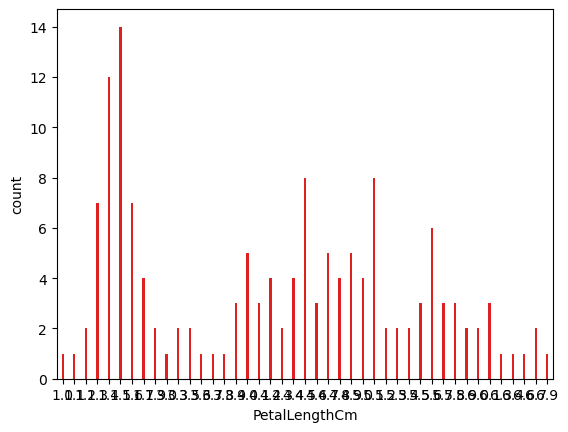

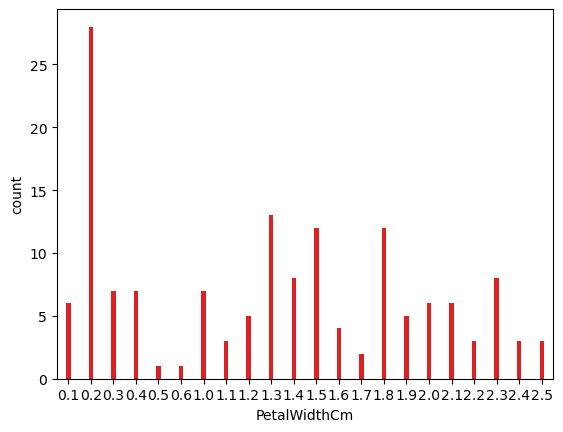

In [44]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.countplot(x=df[i],width=0.2,color="red")
        plt.show()

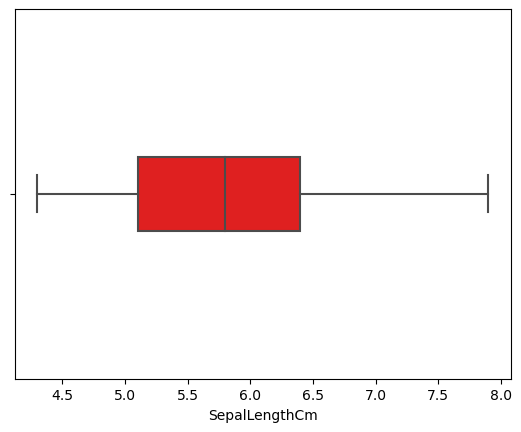

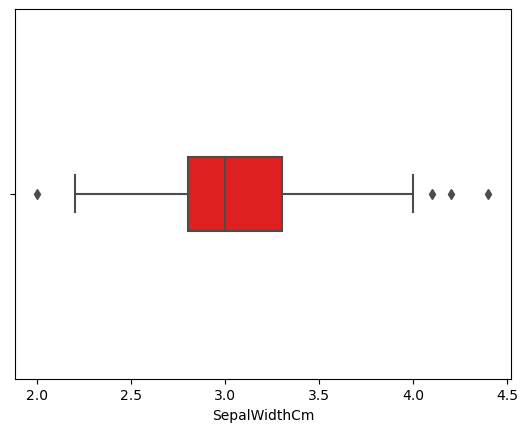

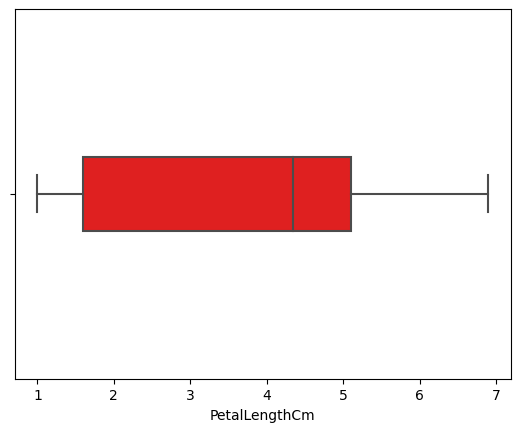

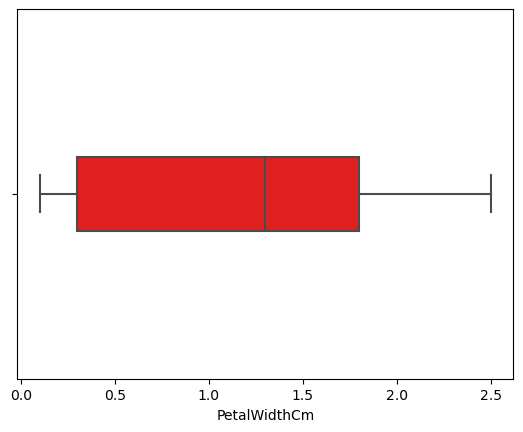

In [45]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i],width=0.2,color="red")
        plt.show()

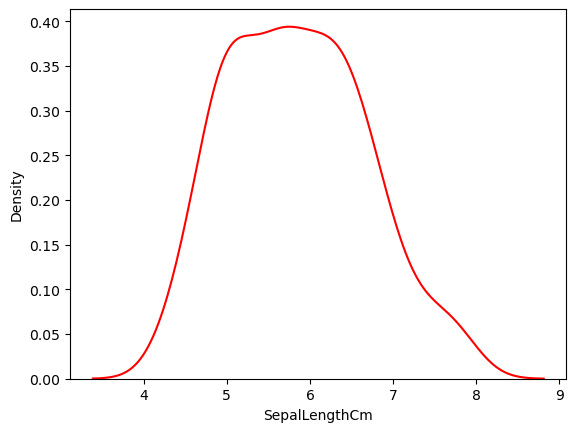

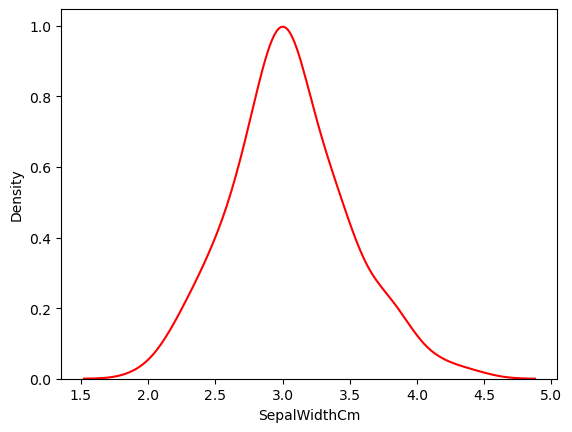

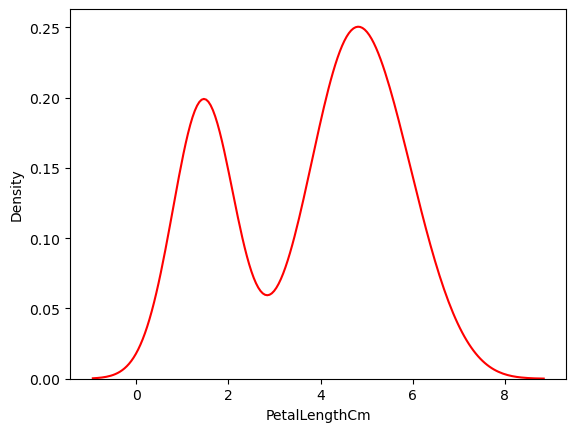

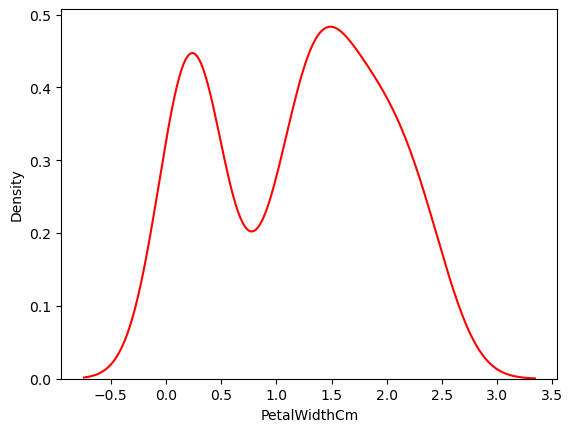

In [48]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.kdeplot(x=df[i],color="red")
        plt.show()

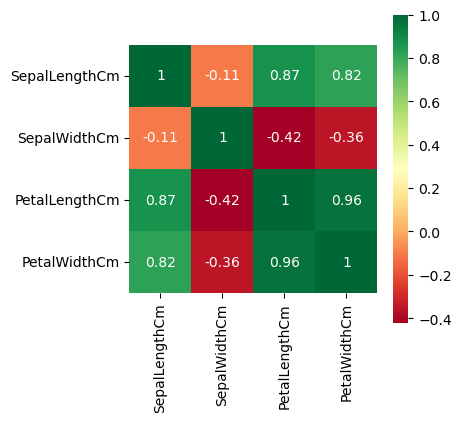

In [18]:
#check the correlation of all features with dependent variable using heatmap.
plt.figure(figsize=(4,4))  
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True) 

In [19]:
x=df.drop("Species",axis=1)
y=df.Species

In [20]:
#Scaling 
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()

In [22]:
x=pd.DataFrame(ss.fit_transform(x))

In [23]:
x.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [24]:
#Splitting Data into Train & Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=12)

In [25]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
M1= LogisticRegression(max_iter=10000)    
M1.fit(x_train,y_train)
y_pred1=M1.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
#evaluation
acc1=accuracy_score(y_test,y_pred1)
print(acc1)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.98
[[24  0  0]
 [ 0 13  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.97        50
   weighted avg       0.98      0.98      0.98        50



In [32]:
#SVM
from sklearn.svm import SVC
M2=SVC()
M2.fit(x_train,y_train)
y_pred2=M2.predict(x_test)

In [33]:
#evaluation
acc2=accuracy_score(y_test,y_pred2)
print(acc2)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.96
[[23  1  0]
 [ 0 13  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.96      0.98        24
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.96        50
      macro avg       0.95      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(x_train,y_train)
y_pred3 = rf.predict(x_test)

In [35]:
#evaluation
acc3=accuracy_score(y_test,y_pred3)
print(acc3)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.98
[[24  0  0]
 [ 0 13  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.97        50
   weighted avg       0.98      0.98      0.98        50

